use `nltk.download('stopwords')` if you get `Attempted to load corpora/stopwords` error

In [353]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Find the information about dataset from the below Link 
- https://www.kaggle.com/datasets/samps74/e-commerce-customer-behavior-dataset/data

In [354]:
df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/E-commerce.csv')

## 1. Data Inspection

In [355]:
# view the first 5 rows of the dataset
df.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...","Great pair of jeans, very comfortable. Rating:...",32.50
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",Great customer service!,123.45
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",Great electronics. The sound quality is excell...,125.60
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},"{""Product 1"": {""Rating"": 4, ""Review"": ""Great e...",327.60
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},"{""Product 1"": {""Rating"": 3, ""Review"": ""Good pr...",214.90


In [356]:
# Check the number of rows and columns in a dataset
df.shape

(50, 9)

In [357]:
# check the datatypes and not-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


## 2. After data inspection we confirm there is no null values in a dataset

## 3. Check Duplicates 

In [358]:
df.duplicated().sum()

np.int64(0)

**There is no duplicates in dataset**

## 4. Check OutLiers

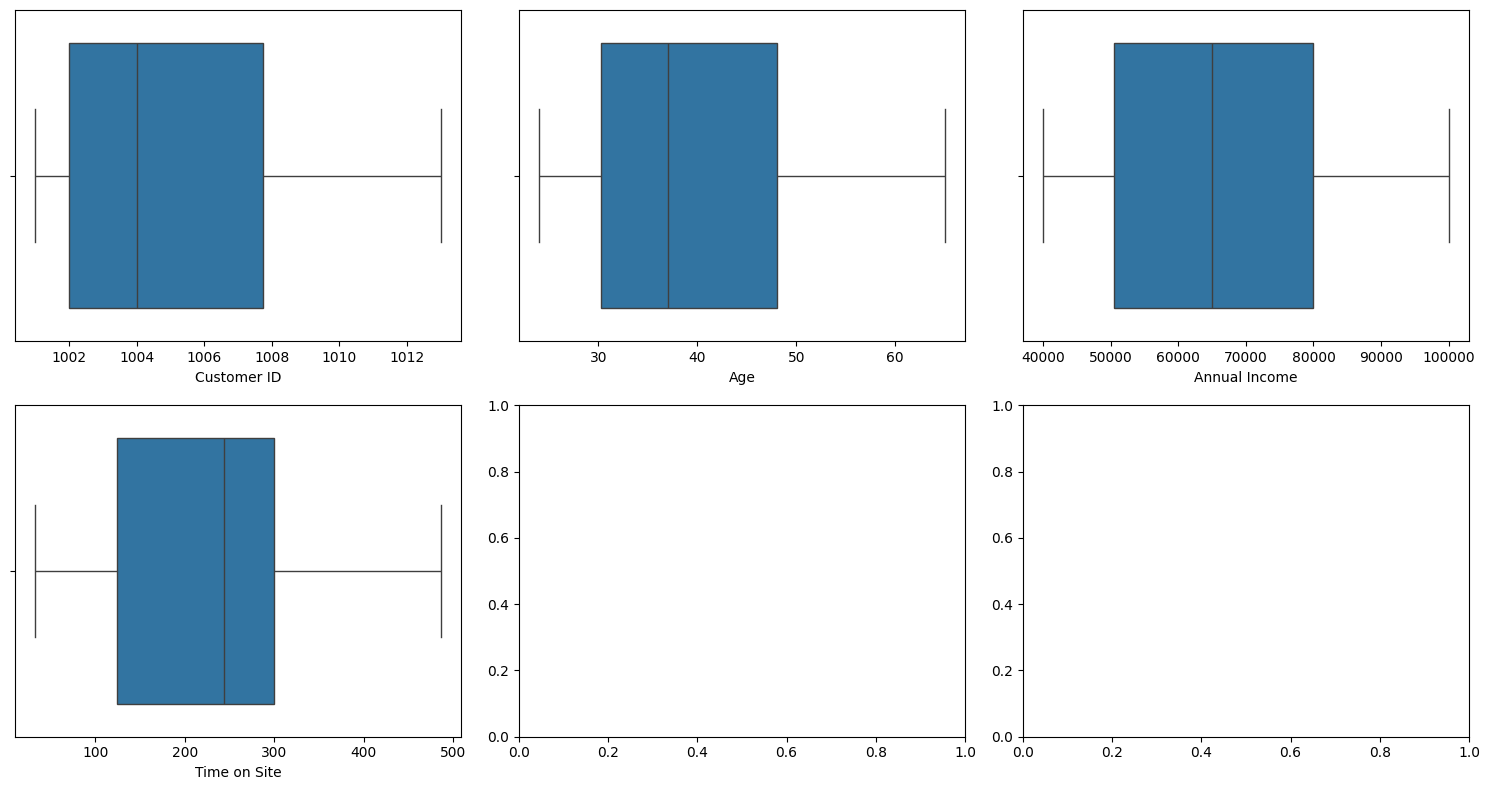

In [359]:
numarical_columns = df.select_dtypes(include=['number']).columns.tolist()

cols = 3
rows = (len(numarical_columns) + cols - 1) // cols

fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axis = axis.flatten()

for i, column in enumerate(numarical_columns):
    sns.boxplot(x=df[column], ax=axis[i])

plt.tight_layout()
plt.show()

In [360]:
# return the text data without numbers and special charecters
def simplify_text(text):
    text = text.lower()
    text = text.strip()
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    
    return text

In [361]:
# clean the product review
df['Product Reviews'] = df['Product Reviews'].apply(simplify_text)

In [362]:
df['Product Reviews'].head(15)

0     great pair of jeans very comfortable rating  s...
1                                great customer service
2     great electronics the sound quality is excelle...
3     product  rating  review great experience buyin...
4     product  rating  review good product but could...
5     product  rating  review awesome product highly...
6     product  rating  review great product will def...
7     product  rating  review good product but not w...
8     product  rating  review outstanding product ex...
9     product  rating  review good product but could...
10    product  rating  review good product but not w...
11    product  rating  review great product will def...
12            review text great quality clothes rating 
13    review text good product but could be cheaper ...
14    review text very satisfied with my purchase ra...
Name: Product Reviews, dtype: object

---
use `nltk.download('vader_lexicon')` if you got `Attempted to load sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt` Error

In [363]:
# create sentiment feature using SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

**🔍 What is compound in sia.polarity_scores()?**
- It is a normalized score that ranges from -1 (most negative) to +1 (most positive).
- It is computed using the sum of the valence scores of each word in the text, then normalized to range between -1 and +1.

In [364]:
# return the compound score
def nltk_analyze(text):
    return sia.polarity_scores(text)['compound']

# create sentiment column with compound score
df['sentiment_rate'] = df['Product Reviews'].apply(nltk_analyze)

In [365]:
df.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site,sentiment_rate
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...",great pair of jeans very comfortable rating s...,32.50,0.8268
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",great customer service,123.45,0.6249
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",great electronics the sound quality is excelle...,125.60,0.8908
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},product rating review great experience buyin...,327.60,0.8316
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},product rating review good product but could...,214.90,0.7003


In [366]:
# categarize the review based on compumnd score
def categorize_sentiment(compound):
    if compound <= 0:
        return 'Negative'
    elif compound <= 0.5:
        return 'Neutral'
    else:
        return 'Positive'

In [367]:
df['sentiment_category'] = df['sentiment_rate'].apply(categorize_sentiment)

In [368]:
df.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site,sentiment_rate,sentiment_category
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...",great pair of jeans very comfortable rating s...,32.50,0.8268,Positive
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",great customer service,123.45,0.6249,Positive
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",great electronics the sound quality is excelle...,125.60,0.8908,Positive
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},product rating review great experience buyin...,327.60,0.8316,Positive
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},product rating review good product but could...,214.90,0.7003,Positive


In [369]:
# def extract_product_category(history):
#     try:
#         history_list = json.loads(history)
#         if isinstance(history_list, list):
#             return [item.get('Product Category', '') for item in history_list if 'Product Category' in item]
#     except (json.JSONDecodeError, TypeError):
       
#         return None

def extract_product_category(history):
    try:
        history_list = json.loads(history)
        if isinstance(history_list, list):
            return [item.get('Product Category', '') for item in history_list if 'Product Category' in item]
    except (json.JSONDecodeError, TypeError):
        # Fix malformed string: wrap in brackets and replace single quotes with double quotes
        try:
            fixed_history = '[' + history + ']'
            fixed_history = fixed_history.replace("'", '"')
            history_list = json.loads(fixed_history)
            if isinstance(history_list, list):
                return [item.get('Product Category', '') for item in history_list if 'Product Category' in item]
        except Exception:
            return None


In [370]:
df['Product Categories'] = df['Purchase History'].apply(extract_product_category)
df['Product Categories'].value_counts()

Product Categories
[Clothing, Home & Garden]                              13
[Electronics, Clothing, Home & Garden]                  9
[Electronics, Home & Garden]                            8
[Electronics, Clothing]                                 5
[Clothing, Electronics]                                 4
[Home & Garden, Electronics]                            4
[Electronics]                                           2
[]                                                      1
[Electronics, Clothing, Home & Garden, Electronics]     1
[Clothing, Home & Garden, Electronics]                  1
[Clothing]                                              1
[Clothing, Electronics, Home & Garden]                  1
Name: count, dtype: int64

In [371]:
df.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site,sentiment_rate,sentiment_category,Product Categories
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...",great pair of jeans very comfortable rating s...,32.50,0.8268,Positive,[]
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",great customer service,123.45,0.6249,Positive,"[Clothing, Electronics]"
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",great electronics the sound quality is excelle...,125.60,0.8908,Positive,"[Electronics, Home & Garden]"
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},product rating review great experience buyin...,327.60,0.8316,Positive,"[Electronics, Clothing, Home & Garden, Electro..."
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},product rating review good product but could...,214.90,0.7003,Positive,"[Clothing, Home & Garden, Electronics]"


In [372]:
df_exploded = df['Product Categories'].explode()
non_empty_categories = df_exploded.dropna()    
non_empty_categories.head()

1         Clothing
1      Electronics
2      Electronics
2    Home & Garden
3      Electronics
Name: Product Categories, dtype: object

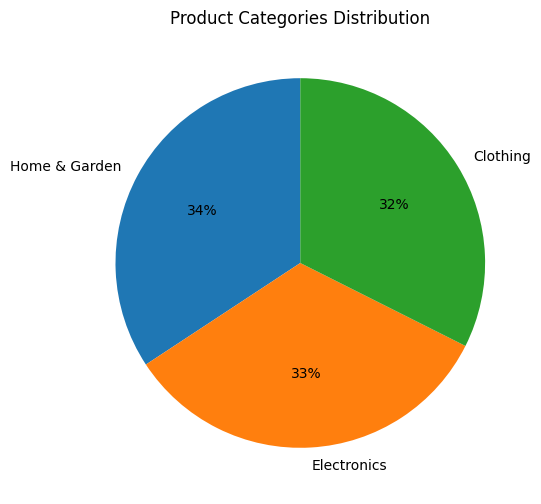

In [373]:
category_counts = non_empty_categories.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts.values,labels=category_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Product Categories Distribution')
plt.show()

The pie chart indicates that the Clothing, Home & Garden and Electronics categories are performing equaly

In [374]:
df['Browsing Categories'] = df['Browsing History'].apply(extract_product_category)
print(df['Browsing Categories'].value_counts())

Browsing Categories
[]                              39
[Home & Garden, Electronics]     4
[Clothing, Electronics]          3
[Electronics, Clothing]          2
[Home & Garden, Clothing]        1
[Home & Garden]                  1
Name: count, dtype: int64


In [375]:
df_exploded2 = df['Browsing Categories'].explode()
non_empty_categories = df_exploded2.dropna()    
non_empty_categories.head()

1     Home & Garden
1       Electronics
2          Clothing
2       Electronics
38    Home & Garden
Name: Browsing Categories, dtype: object

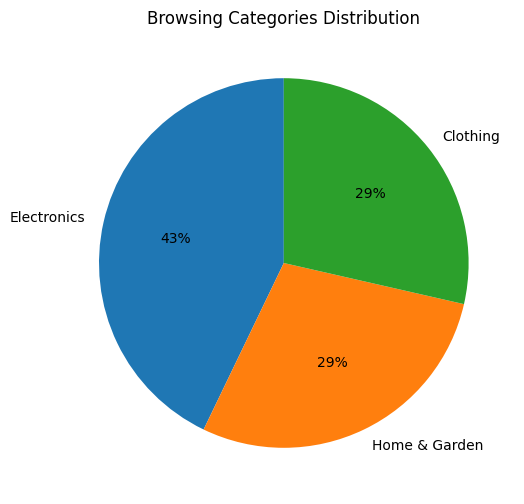

In [376]:
category_counts = non_empty_categories.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts.values,labels=category_counts.index, autopct='%1.0f%%', startangle=90)
plt.title('Browsing Categories Distribution')
plt.show()

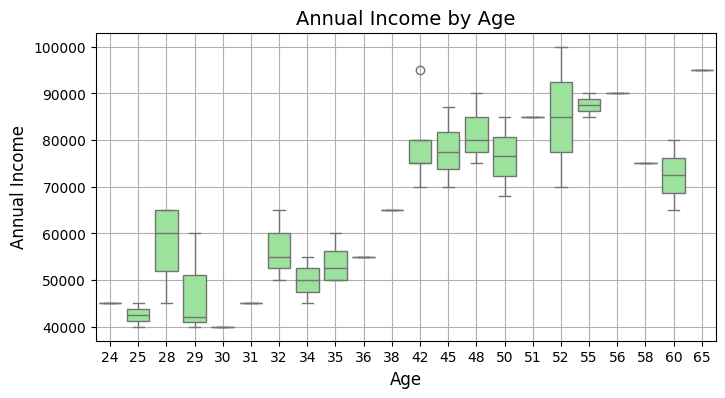

In [377]:
plt.figure(figsize=(8, 4))
#sns.scatterplot(x='Age', y='Annual Income', data=df, color='green', alpha=0.5)
sns.boxplot(x='Age', y='Annual Income', data=df, color='lightgreen')
plt.title('Annual Income by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.grid(True)
plt.show()

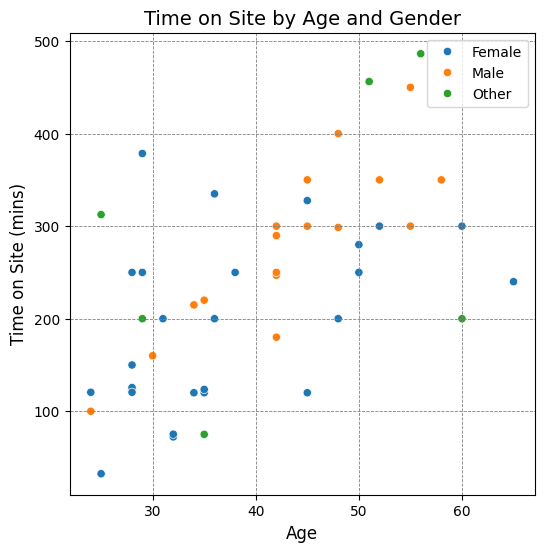

In [378]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Age', y='Time on Site', hue='Gender')
plt.title('Time on Site by Age and Gender', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Time on Site (mins)', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.6)
plt.show()

In [379]:
df.head()

,Customer ID,Age,Gender,Location,Annual Income,Purchase History,Browsing History,Product Reviews,Time on Site,sentiment_rate,sentiment_category,Product Categories,Browsing Categories
0,1001,25,Female,City D,45000,"[{""Date"": ""2022-03-05"", ""Category"": ""Clothing""...","[{""Timestamp"": ""2022-03-10T14:30:00Z""}, {""Time...",great pair of jeans very comfortable rating s...,32.50,0.8268,Positive,[],[]
1,1001,28,Female,City D,52000,"[{""Product Category"": ""Clothing"", ""Purchase Da...","[{""Product Category"": ""Home & Garden"", ""Timest...",great customer service,123.45,0.6249,Positive,"[Clothing, Electronics]","[Home & Garden, Electronics]"
2,1001,28,Female,City D,65000,"[{""Product Category"": ""Electronics"", ""Purchase...","[{""Product Category"": ""Clothing"", ""Timestamp"":...",great electronics the sound quality is excelle...,125.60,0.8908,Positive,"[Electronics, Home & Garden]","[Clothing, Electronics]"
3,1001,45,Female,City D,70000,"{'Purchase Date': '2022-08-15', 'Product Categ...",{'Timestamp': '2022-09-03 14:30:00'},product rating review great experience buyin...,327.60,0.8316,Positive,"[Electronics, Clothing, Home & Garden, Electro...",[]
4,1002,34,Male,City E,45000,"{'Purchase Date': '2022-07-25', 'Product Categ...",{'Timestamp': '2022-08-10 17:15:00'},product rating review good product but could...,214.90,0.7003,Positive,"[Clothing, Home & Garden, Electronics]",[]


## Drop Unwanted columns

In [380]:
drop_columns = ['Customer ID', 'Purchase History', 'Browsing History', 'Product Reviews', 'sentiment_rate']
df.drop(columns=drop_columns, inplace=True)

In [381]:
# dataframe after deleting unwanted columns
df.head()

,Age,Gender,Location,Annual Income,Time on Site,sentiment_category,Product Categories,Browsing Categories
0,25,Female,City D,45000,32.50,Positive,[],[]
1,28,Female,City D,52000,123.45,Positive,"[Clothing, Electronics]","[Home & Garden, Electronics]"
2,28,Female,City D,65000,125.60,Positive,"[Electronics, Home & Garden]","[Clothing, Electronics]"
3,45,Female,City D,70000,327.60,Positive,"[Electronics, Clothing, Home & Garden, Electro...",[]
4,34,Male,City E,45000,214.90,Positive,"[Clothing, Home & Garden, Electronics]",[]


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  50 non-null     int64  
 1   Gender               50 non-null     object 
 2   Location             50 non-null     object 
 3   Annual Income        50 non-null     int64  
 4   Time on Site         50 non-null     float64
 5   sentiment_category   50 non-null     object 
 6   Product Categories   50 non-null     object 
 7   Browsing Categories  50 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.3+ KB


## 5. Label the categorical columns

In [383]:
category_mappings = {}  # To store column-wise mappings
encoder = LabelEncoder()

cat_col = ['Gender', 'Location', 'sentiment_category']

for column in cat_col:
  encoder.fit(df[column].unique())
  df[column] = encoder.transform(df[column])

  # Store mapping: category -> encoded value
  mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  category_mappings[column] = mapping

In [384]:
category_mappings

{'Gender': {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)},
 'Location': {'City A': np.int64(0),
  'City B': np.int64(1),
  'City C': np.int64(2),
  'City D': np.int64(3),
  'City E': np.int64(4),
  'City F': np.int64(5),
  'City G': np.int64(6),
  'City H': np.int64(7),
  'City I': np.int64(8),
  'City J': np.int64(9),
  'City K': np.int64(10),
  'City L': np.int64(11),
  'City M': np.int64(12),
  'City N': np.int64(13),
  'City O': np.int64(14),
  'City P': np.int64(15)},
 'sentiment_category': {'Negative': np.int64(0),
  'Neutral': np.int64(1),
  'Positive': np.int64(2)}}

In [385]:
# Number of product categories interacted with
df['Num_Product_Categories'] = df['Product Categories'].apply(lambda x: len(x))

# Number of Browsing categories interacted with
df['Num_Browsing_Categories'] = df['Browsing Categories'].apply(lambda x: len(x))

df.drop(columns=['Product Categories', 'Browsing Categories'], inplace=True)

In [386]:
# DataFrame after Encoding
df.head()

,Age,Gender,Location,Annual Income,Time on Site,sentiment_category,Num_Product_Categories,Num_Browsing_Categories
0,25,0,3,45000,32.50,2,0,0
1,28,0,3,52000,123.45,2,2,2
2,28,0,3,65000,125.60,2,2,2
3,45,0,3,70000,327.60,2,4,0
4,34,1,4,45000,214.90,2,3,0


## 6. Scale the features

In [387]:
scaler = StandardScaler()

In [388]:
df[df.columns] = scaler.fit_transform(df)

In [389]:
df.head()

,Age,Gender,Location,Annual Income,Time on Site,sentiment_category,Num_Product_Categories,Num_Browsing_Categories
0,-1.365436,-0.866025,-0.905656,-1.230444,-1.843065,0.437981,-3.355397,-0.523530
1,-1.091619,-0.866025,-0.905656,-0.815954,-1.005338,0.437981,-0.248548,1.969469
2,-1.091619,-0.866025,-0.905656,-0.046186,-0.985534,0.437981,-0.248548,1.969469
3,0.460013,-0.866025,-0.905656,0.249878,0.875059,0.437981,2.858301,-0.523530
4,-0.543984,0.577350,-0.619056,-1.230444,-0.163005,0.437981,1.304877,-0.523530


## 7. Reduce the Dimansion

In [390]:
pca = PCA(n_components=2)  # Keep only 1 principal component
pca_performed_df = pca.fit_transform(df.iloc[:, :-1])

In [391]:
# Check how much variance is explained
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance ratio: [0.39428423 0.20492504]
Number of components selected: 2


## Identify the K

In [392]:
# Range of clusters to try
inertia = []
ranges = range(1, 10)

for k in ranges:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(pca_performed_df)
    inertia.append(kmeans.inertia_)

In [393]:
# Create a DataFrame for Seaborn plotting
elbow_df = pd.DataFrame({
    'n_clusters': list(range(1, 10)),
    'Inertia': inertia
})
elbow_df

,n_clusters,Inertia
0,1,209.723243
1,2,108.209420
2,3,71.662198
3,4,59.698860
4,5,50.486203
5,6,41.845011
6,7,33.437622
7,8,27.556527
8,9,23.473837


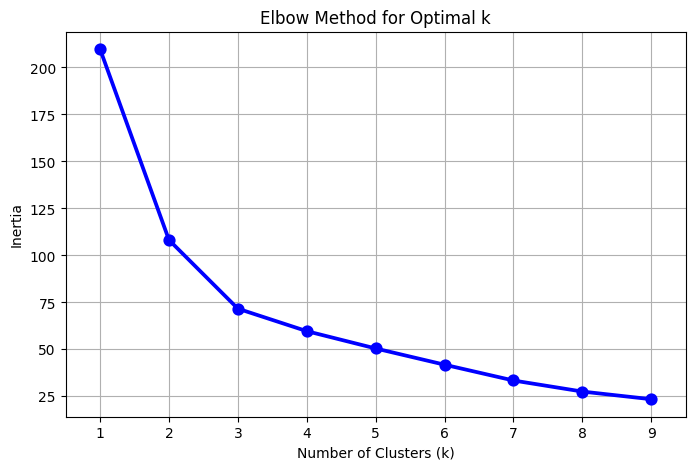

In [394]:
# Plot the Elbow Method chart
plt.figure(figsize=(8, 5))
sns.pointplot(x='n_clusters', y='Inertia', data=elbow_df, marker='o', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## 8. Build the Model with K=5

In [395]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(pca_performed_df)

In [396]:
print(f'cluster centers: {kmeans.cluster_centers_}')

cluster centers: [[-0.71029989 -1.87706226]
 [ 1.26716112  1.28316907]
 [-1.27196853  0.37242163]
 [ 1.60985269 -0.19588417]
 [-2.93761745  1.32671529]]


In [397]:
df.head()

,Age,Gender,Location,Annual Income,Time on Site,sentiment_category,Num_Product_Categories,Num_Browsing_Categories,Cluster
0,-1.365436,-0.866025,-0.905656,-1.230444,-1.843065,0.437981,-3.355397,-0.523530,4
1,-1.091619,-0.866025,-0.905656,-0.815954,-1.005338,0.437981,-0.248548,1.969469,2
2,-1.091619,-0.866025,-0.905656,-0.046186,-0.985534,0.437981,-0.248548,1.969469,2
3,0.460013,-0.866025,-0.905656,0.249878,0.875059,0.437981,2.858301,-0.523530,3
4,-0.543984,0.577350,-0.619056,-1.230444,-0.163005,0.437981,1.304877,-0.523530,0
